# Geometric Image Transformations

This notebook demonstrates manual implementations of fundamental geometric transformations: **Translation**, **Scaling**, **Rotation**, and **Shearing**, using inverse mapping to prevent holes in the output.

In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

### Utility: Rotated Bounding Box Calculation
Calculates the new dimensions required to fit a rotated image without clipping.

In [2]:
def get_rotated_bounds(w, h, theta):
    rad = math.radians(theta)

    corners = [
        (0, 0),
        (w, 0),
        (0, h),
        (w, h)
    ]

    rotated = []
    for x, y in corners:
        new_x = x * math.cos(rad) - y * math.sin(rad)
        new_y = x * math.sin(rad) + y * math.cos(rad)
        rotated.append((new_x, new_y))

    xs = [p[0] for p in rotated]
    ys = [p[1] for p in rotated]

    min_x, max_x = min(xs), max(xs)
    min_y, max_y = min(ys), max(ys)

    new_w = int(max_x - min_x)
    new_h = int(max_y - min_y)

    return new_w, new_h, min_x, min_y

### 1. Translation
Moves the image by Tx and Ty while expanding the canvas.

In [3]:
def translate_image(img, Tx, Ty):
    h, w = img.shape[:2]

    new_w = w + abs(Tx)
    new_h = h + abs(Ty)

    output = np.full((new_h, new_w, 3), 255, dtype=np.uint8)

    offset_x = max(Tx, 0)
    offset_y = max(Ty, 0)

    for y in range(h):
        for x in range(w):
            new_x = x + offset_x
            new_y = y + offset_y
            output[new_y][new_x] = img[y][x]

    return output

### 2. Scaling
Resizes the image using inverse mapping to ensure every pixel in the output is filled.

In [4]:
def scale_image(img, Sx, Sy):
    h, w = img.shape[:2]

    new_w = int(w * Sx)
    new_h = int(h * Sy)

    output = np.full((new_h, new_w, 3), 255, dtype=np.uint8)

    for y_out in range(new_h):
        for x_out in range(new_w):
            # Inverse scaling
            x_src = int(round(x_out / Sx))
            y_src = int(round(y_out / Sy))

            if 0 <= x_src < w and 0 <= y_src < h:
                output[y_out][x_out] = img[y_src][x_src]

    return output

### 3. Rotation
Rotates the image by theta degrees using inverse mapping and bounding box adjustments.

In [5]:
def rotate_image(img, theta):
    h, w = img.shape[:2]
    rad = math.radians(theta)
    new_w, new_h, min_x, min_y = get_rotated_bounds(w, h, theta)

    output = np.full((new_h, new_w, 3), 255, dtype=np.uint8)

    for y_out in range(new_h):
        for x_out in range(new_w):
            # Shift back to origin space
            x_shifted = x_out + min_x
            y_shifted = y_out + min_y

            # Inverse rotation
            x_src = int(round(x_shifted * math.cos(rad) + y_shifted * math.sin(rad)))
            y_src = int(round(-x_shifted * math.sin(rad) + y_shifted * math.cos(rad)))

            if 0 <= x_src < w and 0 <= y_src < h:
                output[y_out][x_out] = img[y_src][x_src]

    return output

### 4. Shearing
Applies horizontal shear to the image.

In [6]:
def shear_horizontal(img, sh):
    h, w = img.shape[:2]

    new_w = int(w + abs(sh) * h)
    new_h = h

    output = np.full((new_h, new_w, 3), 255, dtype=np.uint8)

    for y in range(h):
        for x in range(w):
            new_x = int(x + sh * y)

            if 0 <= new_x < new_w:
                output[y][new_x] = img[y][x]

    return output

### Execution and Visualization

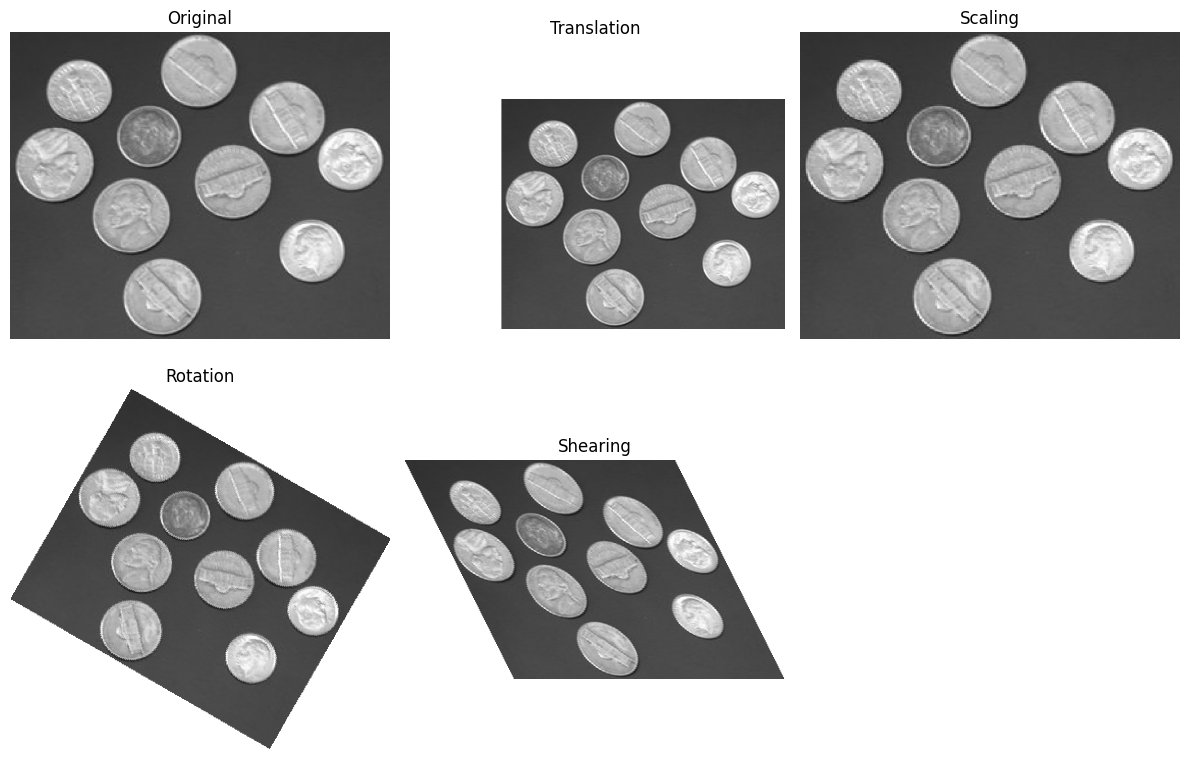

In [7]:
img = cv2.imread("coin.png")
if img is not None:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    translated = translate_image(img_rgb, 100, 60)
    scaled = scale_image(img_rgb, 1.5, 1.5)
    rotated = rotate_image(img_rgb, 30)
    sheared = shear_horizontal(img_rgb, 0.5)

    plt.figure(figsize=(12,8))

    plt.subplot(2,3,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis("off")
    plt.subplot(2,3,2); plt.imshow(translated); plt.title("Translation"); plt.axis("off")
    plt.subplot(2,3,3); plt.imshow(scaled); plt.title("Scaling"); plt.axis("off")
    plt.subplot(2,3,4); plt.imshow(rotated); plt.title("Rotation"); plt.axis("off")
    plt.subplot(2,3,5); plt.imshow(sheared); plt.title("Shearing"); plt.axis("off")

    plt.tight_layout()
    plt.show()
else:
    print("Error: coin.png not found.")